In [1]:
import gensim
from gensim.corpora import Dictionary
from gensim.models import Word2Vec
from tqdm import tqdm
from sklearn.decomposition import PCA

In [2]:
file = open("../data/pdb.txt","r")
sequences = file.readlines()
file.close()

len(sequences)
# print (sequences[0][:-1])
cleaned = []
valid = "GAVLIMFWPSTCYNQDEKRH"
for i in tqdm(sequences):
    flag = 0
    for j in set(list(i[:-1])):
        if j in valid:
            continue
        else:
            flag = 1
    if flag == 0:
        cleaned.append(list(i[:-1]))
# cleaned = [list(i[:-1]) for i in sequences]

100%|██████████| 482912/482912 [00:06<00:00, 73441.38it/s]


In [3]:
print (len(cleaned))
print (len(sequences))

460455
482912


In [4]:
model = Word2Vec(cleaned,size=10, workers=8,window=3 )
model.train(cleaned,total_examples=model.corpus_count,epochs=1)

(18121013, 114838203)

In [5]:
dictionary = Dictionary(cleaned)

In [6]:
vocab = []
dct = list(dictionary.items())
for i in dct:
    print (i[1],model.wv.vocab[i[1]])
    vocab.append(i[1])

A Vocab(count:9240847, index:1, sample_int:532166889)
D Vocab(count:6390582, index:9, sample_int:652928734)
E Vocab(count:7540549, index:4, sample_int:595441237)
F Vocab(count:4439214, index:13, sample_int:801902998)
G Vocab(count:8554245, index:2, sample_int:555295147)
H Vocab(count:3040676, index:16, sample_int:996885539)
I Vocab(count:6409919, index:8, sample_int:651826807)
K Vocab(count:6872829, index:6, sample_int:626946557)
L Vocab(count:10288045, index:0, sample_int:501712582)
M Vocab(count:2671724, index:17, sample_int:1075055087)
N Vocab(count:4807824, index:12, sample_int:766375315)
P Vocab(count:5338883, index:11, sample_int:722292863)
Q Vocab(count:4333448, index:14, sample_int:812994043)
R Vocab(count:6087213, index:10, sample_int:670947557)
S Vocab(count:7214476, index:5, sample_int:610243129)
T Vocab(count:6491037, index:7, sample_int:647261796)
V Vocab(count:8069200, index:3, sample_int:573499426)
W Vocab(count:1511430, index:19, sample_int:1510214596)
Y Vocab(count:391

In [7]:
X = []
for i in vocab:
    rep = (model.wv[i])
    X.append(rep)

In [10]:
pca = PCA(2,whiten=True)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

In [11]:
X_2 = pca.fit_transform(X)

In [12]:
for i in range(len(X_2)):
    print(vocab[i],X_2[i])

A [0.8703128 2.7373152]
D [-0.5177775  -0.15562257]
E [-1.3806976  0.6044021]
F [-0.09422216 -0.86407596]
G [1.4839586 1.1362062]
H [-0.16860254 -0.575717  ]
I [-0.6469204  -0.01181968]
K [-1.4173309   0.17544791]
L [-0.7631536  0.4421408]
M [-0.4622245  0.3521613]
N [-0.42080826 -1.5185614 ]
P [ 0.22727421 -0.19445013]
Q [-0.63360935 -0.13684349]
R [-0.5815246   0.99740756]
S [ 0.31518075 -0.6194375 ]
T [1.4180949  0.29061973]
V [-0.15524396  0.7765215 ]
W [ 0.33856004 -1.2029009 ]
Y [-0.12639526 -1.2387623 ]
C [ 2.7151303 -0.9940309]


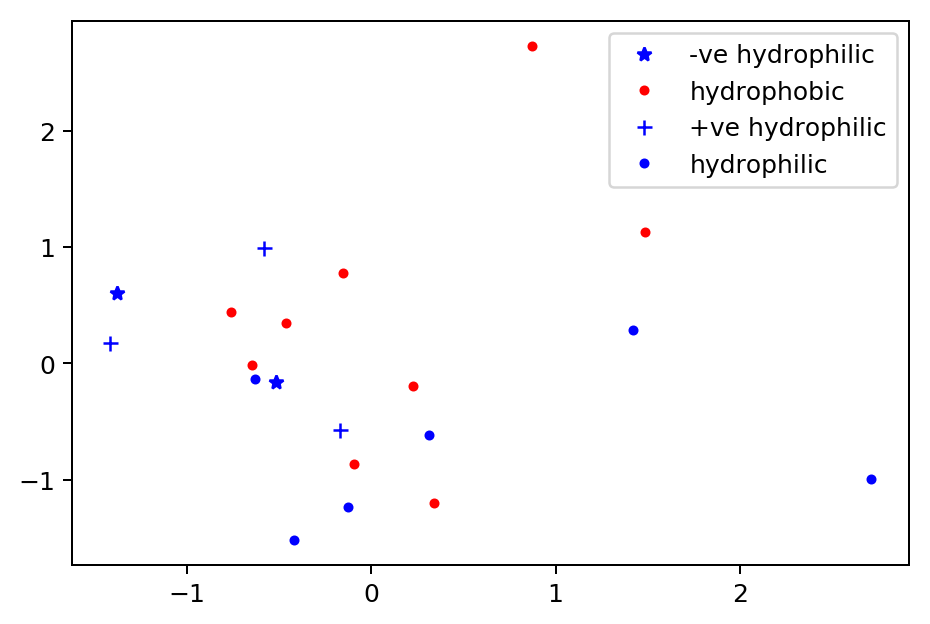

In [13]:
import matplotlib.pyplot as plt

%matplotlib inline
# plt.style.use('seaborn-whitegrid')

cluster = {"G":"r",
          "A":"r",
          "V":"r",
          "L":"r",
          "I":"r",
          "M":"r",
          "F":"r",
          "W":"r",
          "P":"r",
          "S":"b",
          "T":"b",
          "C":"b",
          "Y":"b",
          "N":"b",
          "Q":"b",
          "D":"b",
          "E":"b",
          "K":"b",
           "R":"b",
           "H":"b",
          }
sign = {"G":".",
          "A":".",
          "V":".",
          "L":".",
          "I":".",
          "M":".",
          "F":".",
          "W":".",
          "P":".",
          "S":".",
          "T":".",
          "C":".",
          "Y":".",
          "N":".",
          "Q":".",
          "D":"*",
          "E":"*",
          "K":"+",
           "R":"+",
           "H":"+",
          }
label = {"G":"hydrophobic",
          "A":"hydrophobic",
          "V":"hydrophobic",
          "L":"hydrophobic",
          "I":"hydrophobic",
          "M":"hydrophobic",
          "F":"hydrophobic",
          "W":"hydrophobic",
          "P":"hydrophobic",
          "S":"hydrophilic",
          "T":"hydrophilic",
          "C":"hydrophilic",
          "Y":"hydrophilic",
          "N":"hydrophilic",
          "Q":"hydrophilic",
          "D":"negative hydrophilic",
          "E":"negative hydrophilic",
          "K":"positive hydrophilic",
           "R":"positive hydrophilic",
           "H":"positive hydrophilic",
          }
fig=plt.figure( dpi= 180, facecolor='w', edgecolor='k')

import matplotlib.lines as mlines

blue_line = mlines.Line2D([], [], color='blue', marker='*',linestyle="None",
                           label='-ve hydrophilic')
red_dot = mlines.Line2D([], [], color='red', marker='.',linestyle="None",
                           label='hydrophobic')
blue_p = mlines.Line2D([], [], color='blue', marker='+',linestyle="None",
                           label='+ve hydrophilic')
blue_dot = mlines.Line2D([], [], color='blue', marker='.',linestyle="None",
                           label='hydrophilic')
plt.legend(handles=[blue_line,red_dot,blue_p,blue_dot])
for i in range(len(X_2[:])):
    plt.plot(X_2[i][0],X_2[i][1],sign[vocab[i]],color=cluster[vocab[i]],label = label[vocab[i]] )


In [14]:
len(X_2)

20